# **Curso** : Python for Data Science

**Sesión 05**
Reducción de Dimensionalidad

**Profesor**:
* Ing. Cristhian Castro Chávez
* castro.ca@pucp.pe


In [1]:
# Importamos las librerías necesarias
%matplotlib inline
from scipy.stats import pearsonr       # Importamos funcion pearsonr de scipy.stats
from sklearn.decomposition import PCA  # Importamos clase PCA de sklearn.decomposition
import matplotlib.pyplot as plt        # Importamos pyplot de matplotlib con el alias plt
import numpy as np                     # Importamos numpy con el alias np
import pandas as pd                    # Importamos pandas con el alias pd
import seaborn as sns                  # Importamos seaborn con el alias sns
import warnings                        # Importamos el módulo de warnings
plt.style.use('default')               # Establecemos el estilo predeterminado para los gráficos
warnings.filterwarnings("ignore")      # Ignoramos las advertencias

# (1) Entendiendo PCA paso a paso

## <span style="color: green;">Eigendecomposition de la matriz de covarianza</span> <span style="color: blue;">vs</span> <span style="color: green;">SVD</span>

La eigendecomposición de la matriz de covarianza y SVD son métodos utilizados en álgebra lineal para descomponer matrices en componentes más simples.

- **eigendecomposition de la matriz de covarianza**: Consiste en encontrar los eigenvectores y eigenvalores de la matriz de covarianza de un conjunto de datos. Los eigenvectores representan direcciones importantes en los datos y los eigenvalores indican la importancia de esas direcciones.

- **SVD o Singular Value Decomposition (Descomposición de Valores Singulares)**: Es un método más general que la eigendecomposición y se aplica a cualquier matriz. SVD descompone una matriz en tres componentes: una matriz de vectores singulares izquierdos, una matriz diagonal de valores singulares y una matriz de vectores singulares derechos. Se utiliza comúnmente en aplicaciones de reducción de dimensionalidad y reconstrucción de matrices.

In [2]:
# Creamos un arreglo de prueba de dimensiones 5x5
matrix_A = np.array(
    [
        [20, 50, 4, 240],
        [25, 60, 5, 300],
        [30, 65, 5.5, 280],
        [40, 75, 6, 265],
        [30, 55, 3, 310],
    ]
)
matrix_A

array([[ 20. ,  50. ,   4. , 240. ],
       [ 25. ,  60. ,   5. , 300. ],
       [ 30. ,  65. ,   5.5, 280. ],
       [ 40. ,  75. ,   6. , 265. ],
       [ 30. ,  55. ,   3. , 310. ]])

### Paso 1: Centramos la data -- restamos la media o promedio

In [3]:
# Media o promedio de matrix_A por columnas
np.mean(matrix_A.T, axis=0)

array([78.5  , 97.5  , 95.125, 96.5  , 99.5  ])

In [4]:
# Estandarización de datos ----> A_centered es igual a matrix_A - media o promedio de matrix_A por columnas
A_centered = matrix_A - np.mean(matrix_A, axis=0)
A_centered

array([[ -9. , -11. ,  -0.7, -39. ],
       [ -4. ,  -1. ,   0.3,  21. ],
       [  1. ,   4. ,   0.8,   1. ],
       [ 11. ,  14. ,   1.3, -14. ],
       [  1. ,  -6. ,  -1.7,  31. ]])

###### Validamos media o promedio

In [5]:
np.mean(A_centered, axis=0)

array([ 0.00000000e+00,  0.00000000e+00, -1.77635684e-16,  0.00000000e+00])

In [6]:
np.round(
    np.mean(A_centered, axis=0), 
    2
)

array([ 0.,  0., -0.,  0.])

### Paso 2: Calculamos la matriz de covarianza


#### Primer metodo

In [7]:
mat_cov = np.cov(A_centered.T)
mat_cov

array([[ 55.   ,  63.75 ,   4.625,  36.25 ],
       [ 63.75 ,  92.5  ,   9.75 ,   7.5  ],
       [  4.625,   9.75 ,   1.45 ,  -9.125],
       [ 36.25 ,   7.5  ,  -9.125, 780.   ]])

#### Segundo metodo (Solo funciona en Dataframes)

In [8]:
# mat_cov = A_centered.cov()
# mat_cov

#### Calculamos los eigen values y eigen vectors de la matriz de covarianzas. Para eso usamos <span style="color: green;">np.linalg.eig</span>

In [9]:
############################################################
#                       EIGEN VALUES                      #
############################################################

eigen_values, eigen_vectors = np.linalg.eig(mat_cov)
print("Eigen values:")
print(eigen_values)
print("")

############################################################
#                       EIGEN VECTORS                      #
############################################################

print("Eigen vectors:")
print(eigen_vectors.T)

Eigen values:
[7.82071833e+02 1.39879358e+02 6.99670043e+00 2.10917291e-03]

Eigen vectors:
[[ 0.05106462  0.01542297 -0.01117685  0.9985137 ]
 [-0.58948655 -0.8028268  -0.07898694  0.04166298]
 [ 0.78879431 -0.55527664 -0.26128178 -0.03468732]
 [ 0.1664378  -0.21656204  0.96196048  0.00560096]]


#### Podemos usar SVD para comprobarlo (otro método menos costoso cuando hablamos de miles de dimensiones). Para eso usamos <span style="color: green;">np.linalg.svd</span>

In [10]:
U, s, VT = np.linalg.svd(A_centered)

############################################################
#                   LEFT SINGULAR VECTORS                  #
############################################################

print("Left Singular Vectors")
print(U)
print("")

############################################################
#                      SINGULAR VALUES                     #
############################################################

print("Singular Values")
print(s)
print("")

############################################################
#           RIGHT SINGULAR VECTOR O EIGEN VECTORS          #
############################################################

print("Right Singular Vector o Eigen vectors:")
print(VT)

Left Singular Vectors
[[-0.70736046 -0.53127776  0.10294344 -0.08238787  0.4472136 ]
 [ 0.37091628 -0.16961102 -0.64396115 -0.46793937  0.4472136 ]
 [ 0.01970869  0.16159215 -0.31681363  0.82044419  0.4472136 ]
 [-0.23629234  0.77829534  0.1982552  -0.3148288   0.4472136 ]
 [ 0.55302784 -0.23899871  0.65957614  0.04471184  0.4472136 ]]

Singular Values
[55.93109449 23.6541208   5.29025535  0.09185146]

Right Singular Vector o Eigen vectors:
[[ 0.05106462  0.01542297 -0.01117685  0.9985137 ]
 [ 0.58948655  0.8028268   0.07898694 -0.04166298]
 [ 0.78879431 -0.55527664 -0.26128178 -0.03468732]
 [ 0.1664378  -0.21656204  0.96196048  0.00560096]]


#### La raíz cuadrada de los eigenvalues que hallamos anteriormente corresponden a los singular values (matriz diagonal Sigma)

In [11]:
np.sqrt(eigen_values) * 2

array([55.93109449, 23.6541208 ,  5.29025535,  0.09185146])

### PCA de sklearn.decomposition

In [12]:
matrix_A

array([[ 20. ,  50. ,   4. , 240. ],
       [ 25. ,  60. ,   5. , 300. ],
       [ 30. ,  65. ,   5.5, 280. ],
       [ 40. ,  75. ,   6. , 265. ],
       [ 30. ,  55. ,   3. , 310. ]])

##### Si no se entrena la data no obtiene <span style="color: green;">.components_</span>, <span style="color: green;">.explained_variance_</span>, <span style="color: green;">.explained_variance_ratio</span>

In [13]:
model = PCA()
model.fit_transform(matrix_A);

##### Con <span style="color: green;">.components_</span> visualizamos los <span style="color: green;">eigen vectors</span> que es igual a los <span style="color: green;">vectores de carga (loadings)</span>

In [14]:
model.components_

array([[-0.05106462, -0.01542297,  0.01117685, -0.9985137 ],
       [ 0.58948655,  0.8028268 ,  0.07898694, -0.04166298],
       [ 0.78879431, -0.55527664, -0.26128178, -0.03468732],
       [ 0.1664378 , -0.21656204,  0.96196048,  0.00560096]])

###### Eigen vectors que calculamos con Eigendecomposition de la matriz de covarianza

In [15]:
print("Eigen vectors:")
print(eigen_vectors.T)

Eigen vectors:
[[ 0.05106462  0.01542297 -0.01117685  0.9985137 ]
 [-0.58948655 -0.8028268  -0.07898694  0.04166298]
 [ 0.78879431 -0.55527664 -0.26128178 -0.03468732]
 [ 0.1664378  -0.21656204  0.96196048  0.00560096]]


###### Eigen vectors que calculamos con SVD

In [16]:
print("Eigen vectors que calculamos con SVD:")
print(VT)

Eigen vectors que calculamos con SVD:
[[ 0.05106462  0.01542297 -0.01117685  0.9985137 ]
 [ 0.58948655  0.8028268   0.07898694 -0.04166298]
 [ 0.78879431 -0.55527664 -0.26128178 -0.03468732]
 [ 0.1664378  -0.21656204  0.96196048  0.00560096]]


##### Con <span style="color: green;">.explained_variance_ o varianza explicada</span> visualizamos los <span style="color: green;">eigen values</span>

In [17]:
model.explained_variance_

array([7.82071833e+02, 1.39879358e+02, 6.99670043e+00, 2.10917291e-03])

###### También es lo mismo que los eigenvalues de la eigen-decomposition de la matriz de covarianza

In [18]:
print("Eigen values:")
print(eigen_values)

Eigen values:
[7.82071833e+02 1.39879358e+02 6.99670043e+00 2.10917291e-03]


###### De igual forma tiene relación con los singular values de la matriz sigma triangular

In [19]:
print("Singular Values")
print((s / 2) ** 2)

Singular Values
[7.82071833e+02 1.39879358e+02 6.99670043e+00 2.10917291e-03]


##### Con <span style="color: green;">.explained_variance_ratio_</span> visualizamos la <span style="color: green;">ganancia acumulada por cada CP (PCA)</span>

In [20]:
model.explained_variance_ratio_

array([8.41887973e-01, 1.50577919e-01, 7.53183748e-03, 2.27049131e-06])

In [21]:
np.round(model.explained_variance_ratio_, 2)

array([0.84, 0.15, 0.01, 0.  ])

##### La contribución del Primer Comp. Principal

In [22]:
7.82071833e02 / (7.82071833e02 + 1.39879358e02 + 6.99670043e00 + 2.10917291e-03)

0.8418879729720838

##### La contribución de CP1 + CP2 (varianza explicada o eigen values)

In [23]:
(7.82071833e02 + 1.39879358e02) / (
    7.82071833e02 + 1.39879358e02 + 6.99670043e00 + 2.10917291e-03
)

0.9924658920303917

Los signos de los vectores propios y las cargas son arbitrarios, por lo que no hay nada "incorrecto" aquí. Lo único que debe esperar que se conserve es el patrón general de signos dentro de cada vector de carga, es decir, en el ejemplo anterior, la respuesta princomp para PC1 da +,+,-,-,- mientras que la suya da -,-,+, +,+. Está bien. Si el tuyo dio p. -,+,-,-,+ eso sería un problema (porque los dos ya no serían equivalentes hasta la multiplicación por -1).

Los signos son arbitrarios y, por lo tanto, pueden variar entre algoritmos, compiladores, sistemas operativos, etc.

Veamos un segundo ejemplo:

## Ejemplo con datos de 2 variables

In [24]:
# Leemos información ancho y largo de granos de cultivo
grains = pd.read_csv(
    "https://raw.githubusercontent.com/CristhianCastro25/Data_analytics/main/Sesion_7/seeds-width-vs-length.csv",
    header=None,
)
grains.columns = ["width", "lenght"]

In [25]:
grains.head()

,width,lenght
0,3.312,5.763
1,3.333,5.554
2,3.337,5.291
3,3.379,5.324
4,3.562,5.658


In [26]:
grains.shape

(210, 2)

#### Correlacion de Pearson (Grafico Scatter)

La correlación de Pearson es un valor que indica la fuerza y la dirección de una relación lineal entre dos variables. Varía entre -1 y 1, donde 1 indica una correlación positiva perfecta, -1 una correlación negativa perfecta y 0 indica que no hay correlación lineal entre las variables. Un valor cercano a 1 o -1 indica una relación fuerte, mientras que un valor cercano a 0 indica una relación débil.

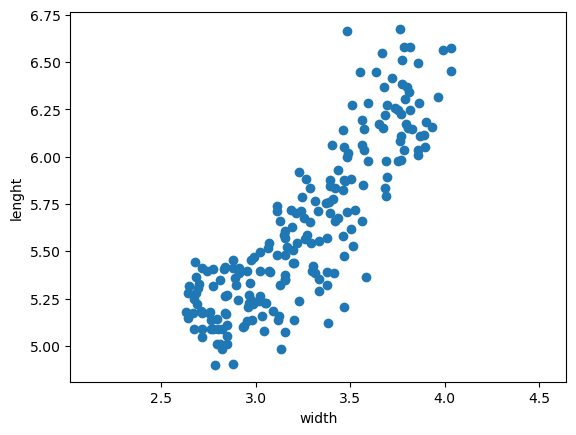

Correlación de Pearson: 0.86


In [27]:
width = grains["width"]
length = grains["lenght"]

# Scatter plot de las 2 variables
plt.scatter(width, length)
plt.xlabel("width")
plt.ylabel("lenght")
plt.axis(
    "equal"
)  # Establece los ejes x e y con la misma escala, se asegura que la unidad de medida en ambas direcciones sea la misma, lo que facilita la interpretación de la relación entre las variables representadas en el gráfico.
plt.show()

# Calculamos la correlación entre las 2 variables
correlation, pvalue = pearsonr(width, length)

# Mostramos la correlación:
print("Correlación de Pearson:", np.round(correlation, 2))

#### Calculamos los componentes principales, los dibujamos y vemos la correlación? (Grafico Scatter)

In [28]:
model = PCA()
pca_features = model.fit_transform(grains)

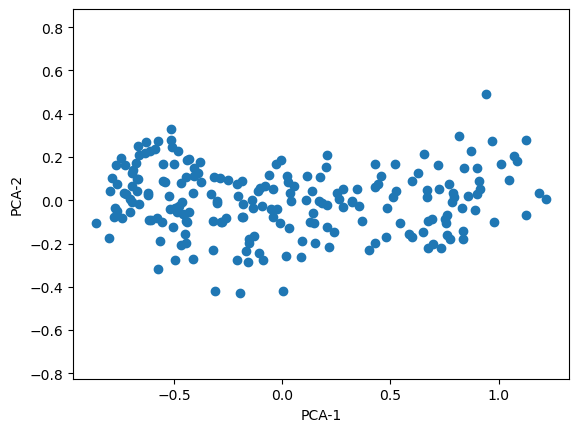

Correlación de Pearson: 0.0


In [29]:
# pca features almacena la data transformada. Cada columna corresponde a un Componente principal. Solo hay 2 componentes en este caso PC1 y PC2
pca_features_width = pca_features[:, 0]
pca_features_lenght = pca_features[:, 1]

# Scatter plot xs vs ys
plt.scatter(pca_features_width, pca_features_lenght)
plt.axis("equal")
plt.xlabel("PCA-1")
plt.ylabel("PCA-2")
plt.show()

# Calculamos la correlación entre las 2 variables
correlation, pvalue = pearsonr(pca_features_width, pca_features_lenght)

# Mostramos la correlación:
print("Correlación de Pearson:", np.round(correlation, 2))

#### <span style="color: green;">Vamos a entender cómo se calcularon los componente principales, paso a paso. (No es necesario verlo)</span>

##### Paso 1: Centramos los datos -- restamos la media o promedio

In [30]:
grains

,width,lenght
0,3.312,5.763
1,3.333,5.554
2,3.337,5.291
3,3.379,5.324
4,3.562,5.658
...,...,...
205,2.981,5.137
206,2.795,5.140
207,3.232,5.236
208,2.836,5.175


In [31]:
grains_centrado = grains.copy()

In [32]:
grains_centrado.mean()

width     3.258605
lenght    5.628533
dtype: float64

In [33]:
grains_centrado["width"].mean()

3.258604761904762

In [34]:
grains_centrado["lenght"].mean()

5.628533333333334

In [35]:
grains_centrado["width"] = grains_centrado["width"] - grains_centrado["width"].mean()
grains_centrado["lenght"] = grains_centrado["lenght"] - grains_centrado["lenght"].mean()
grains_centrado

,width,lenght
0,0.053395,0.134467
1,0.074395,-0.074533
2,0.078395,-0.337533
3,0.120395,-0.304533
4,0.303395,0.029467
...,...,...
205,-0.277605,-0.491533
206,-0.463605,-0.488533
207,-0.026605,-0.392533
208,-0.422605,-0.453533


###### Validamos media o promedio

In [36]:
grains_centrado.mean()

width    -1.099649e-16
lenght   -9.304726e-16
dtype: float64

In [37]:
round(
    grains_centrado.mean(),
    2
)

width    -0.0
lenght   -0.0
dtype: float64

##### Paso 2: Calculamos la matriz de covarianza. Será una matriz de 2 x 2 dado que tenemos solo 2 features

###### Primer metodo

In [38]:
mat_cov_test = np.cov(grains_centrado.T)
mat_cov_test

array([[0.1426682 , 0.14399171],
       [0.14399171, 0.19630525]])

###### Segundo metodo (Solo funciona en Dataframes)

In [39]:
mat_cov = grains_centrado.cov()
mat_cov

,width,lenght
width,0.142668,0.143992
lenght,0.143992,0.196305


###### Calculamos los eigen values y eigen vectors de la matriz de covarianzas. Para eso usamos <span style="color: green;">np.linalg.eig</span>

In [40]:
eigen_values, eigen_vectors = np.linalg.eig(mat_cov)

############################################################
#                       EIGEN VALUES                      #
############################################################

print("Eigen values:")
print(eigen_values)
print("")

############################################################
#                       EIGEN VECTORS                      #
############################################################

print("Eigen vectors:")
print(eigen_vectors.T)

Eigen values:
[0.02301882 0.31595462]

Eigen vectors:
[[-0.76912343  0.63910027]
 [-0.63910027 -0.76912343]]


#### Verificamos con PCA de sklearn.decomposition

In [41]:
model = PCA()
model.fit_transform(grains_centrado);

##### Con <span style="color: green;">.components_</span> visualizamos los <span style="color: green;">eigen vectors</span> que es igual a los <span style="color: green;">vectores de carga (loadings)</span>

In [42]:
model.components_

array([[ 0.63910027,  0.76912343],
       [-0.76912343,  0.63910027]])

##### Calculamos PC1 y PC2

In [43]:
pc_comps = ["PC1", "PC2"]
data_pca = pd.DataFrame(
    np.round(
        model.components_[:2, :], 2
    ),  # :2 porque queremos 2 componentes principales
    columns=mat_cov.columns,
    index=pc_comps,
)

In [44]:
data_pca

,width,lenght
PC1,0.64,0.77
PC2,-0.77,0.64


In [45]:
data_pca.T

,PC1,PC2
width,0.64,-0.77
lenght,0.77,0.64


In [46]:
def color_high(val):
    if val <= -0.40:  # Puedes decidir cualquier valor según tu comprensión.
        return "background: pink; color: black;"
    elif val >= 0.40:
        return "background: skyblue; color: black;"


data_pca.T.style.applymap(color_high)

,PC1,PC2
width,0.640000,-0.770000
lenght,0.770000,0.640000


# (2) Análisis de Componentes Principales: Conjunto de datos de países

## Enlaces utiles

- [Kaggle](https://www.kaggle.com/)
    - [Kaggle - Paises del mundo](https://www.kaggle.com/datasets/fernandol/countries-of-the-world)
- [Scikit-learn](https://scikit-learn.org/stable/)
    - [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
- [Plotly](https://plotly.com/graphing-libraries/)

## Notas

- La funcion <span style="color: green;">df.dropna</span> <span style="color: red;">requiere</span> inplace=True
- La funcion <span style="color: green;">df.drop</span> <span style="color: red;">requiere</span> inplace=True
- La funcion <span style="color: green;">df.reset_index</span> <span style="color: red;">requiere</span> inplace=True
- La funcion <span style="color: green;">df.pop</span> <span style="color: red;">no requiere</span> inplace=True
- La funcion <span style="color: green;">df.insert</span> <span style="color: red;">no requiere</span> inplace=True

## Tratamiento e Imputacion de Datos

### Eliminamos archivos

In [47]:
import os
ruta = '3 DataCreada/'
for archivo in os.listdir(ruta):
    if archivo.startswith('paises_del_mundo'):
        os.remove(os.path.join(ruta, archivo))

### Guardamos archivo original

In [48]:
df_original = pd.read_csv(
    "https://raw.githubusercontent.com/CristhianCastro25/Data_analytics/main/Sesion_7/countries%20of%20the%20world.csv"
)
df_original.to_csv('3 DataCreada/paises_del_mundo_ORIGINAL.csv', sep=';')

In [49]:
df_original.shape

(227, 20)

### <span style="color: green;">******************</span>

### Obtenemos dataframe

In [50]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/CristhianCastro25/Data_analytics/main/Sesion_7/countries%20of%20the%20world.csv"
)

### Eliminamos valores nulos

In [51]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             179 non-null    object 
 1   Region                              179 non-null    object 
 2   Population                          179 non-null    int64  
 3   Area (sq. mi.)                      179 non-null    int64  
 4   Pop. Density (per sq. mi.)          179 non-null    object 
 5   Coastline (coast/area ratio)        179 non-null    object 
 6   Net migration                       179 non-null    object 
 7   Infant mortality (per 1000 births)  179 non-null    object 
 8   GDP ($ per capita)                  179 non-null    float64
 9   Literacy (%)                        179 non-null    object 
 10  Phones (per 1000)                   179 non-null    object 
 11  Arable (%)                          179 non-null  

#### Reiniciamos indice de dataframe

In [52]:
df.reset_index(
    drop=True,  # Eliminamos indice anterior
    inplace=True  
)

### Cambiamos nombre de columnas a español sin tildes

In [53]:
df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [54]:
nuevos_nombres = [
    "Pais",
    "Region",
    "Poblacion",
    "Area (sq. mi.)",
    "Densidad de Poblacion (por sq. mi.)",
    "Litoral (ratio costa/area)",
    "Migracion Neta",
    "Mortalidad Infantil (por 1000 nacimientos)",
    "PIB ($ per capita)",
    "Alfabetizacion (%)",
    "Telefonos (por 1000)",
    "Cultivable (%)",
    "Cultivos (%)",
    "Otros (%)",
    "Clima",
    "Tasa de Natalidad",
    "Tasa de Mortalidad",
    "Agricultura",
    "Industria",
    "Servicios",
]
df.columns = nuevos_nombres

<span style="color: yellow;">

#### Explicacion de columnas

</span>

### Verificamos dataframe

In [55]:
df.head()

,Pais,Region,Poblacion,Area (sq. mi.),Densidad de Poblacion (por sq. mi.),Litoral (ratio costa/area),Migracion Neta,Mortalidad Infantil (por 1000 nacimientos),PIB ($ per capita),Alfabetizacion (%),Telefonos (por 1000),Cultivable (%),Cultivos (%),Otros (%),Clima,Tasa de Natalidad,Tasa de Mortalidad,Agricultura,Industria,Servicios
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,Anguilla,LATIN AMER. & CARIB,13477,102,"132,1","59,80","10,76","21,03",8600.0,"95,0","460,0",0,0,100,2,"14,17","5,34","0,04","0,18","0,78"
4,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,"156,0","34,54","-6,15","19,46",11000.0,"89,0","549,9","18,18","4,55","77,27",2,"16,93","5,37","0,038","0,22","0,743"


In [56]:
df.shape

(179, 20)

#### Guardamos archivo modificado

In [57]:
# Esperar un segundo
import time
time.sleep(1)

# Obtener fecha y hora con segundos
import datetime
current_time = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# Guardamos archivo modificado
df.to_csv(f'3 DataCreada/paises_del_mundo_MODIFICADO_{current_time}.csv', sep=';')

### <span style="color: green;">******************</span>

### Eliminamos columnas que no necesitamos

In [58]:
df.drop(
    [   
        "Cultivable (%)", 
        "Cultivos (%)", 
        "Otros (%)", 
        "Clima", 
        "Litoral (ratio costa/area)"
    ],
    axis=1,
    inplace=True,
)

### Ordenamos columnas

#### Eliminamos la columna del dataframe y guardarla

In [59]:
move_column = df.pop("PIB ($ per capita)")

#### Insertamos columna usando la función insertar (posición, nombre_columna, primera_columna)

In [60]:
df.insert(4, "PIB ($ per capita)", move_column)

### Verificamos dataframe

In [61]:
df.head()

,Pais,Region,Poblacion,Area (sq. mi.),PIB ($ per capita),Densidad de Poblacion (por sq. mi.),Migracion Neta,Mortalidad Infantil (por 1000 nacimientos),Alfabetizacion (%),Telefonos (por 1000),Tasa de Natalidad,Tasa de Mortalidad,Agricultura,Industria,Servicios
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,700.0,"48,0","23,06","163,07","36,0","3,2","46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,4500.0,"124,6","-4,93","21,52","86,5","71,2","15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,6000.0,"13,8","-0,39",31,"70,0","78,1","17,14","4,61","0,101","0,6","0,298"
3,Anguilla,LATIN AMER. & CARIB,13477,102,8600.0,"132,1","10,76","21,03","95,0","460,0","14,17","5,34","0,04","0,18","0,78"
4,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,11000.0,"156,0","-6,15","19,46","89,0","549,9","16,93","5,37","0,038","0,22","0,743"


In [62]:
df.shape

(179, 15)

#### Guardamos archivo modificado

In [63]:
# Esperar un segundo
import time
time.sleep(1)

# Obtener fecha y hora con segundos
import datetime
current_time = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# Guardamos archivo modificado
df.to_csv(f'3 DataCreada/paises_del_mundo_MODIFICADO_{current_time}.csv', sep=';')

### <span style="color: green;">******************</span>

### Convertimos tipos de datos

#### Convertimos a float64

In [64]:
df.shape

(179, 15)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Pais                                        179 non-null    object 
 1   Region                                      179 non-null    object 
 2   Poblacion                                   179 non-null    int64  
 3   Area (sq. mi.)                              179 non-null    int64  
 4   PIB ($ per capita)                          179 non-null    float64
 5   Densidad de Poblacion (por sq. mi.)         179 non-null    object 
 6   Migracion Neta                              179 non-null    object 
 7   Mortalidad Infantil (por 1000 nacimientos)  179 non-null    object 
 8   Alfabetizacion (%)                          179 non-null    object 
 9   Telefonos (por 1000)                        179 non-null    object 
 10  Tasa de Natali

In [66]:
for col in df.columns[5:]:
    print(col)
    df[col] = df[col].str.replace(",", ".").astype(float)

Densidad de Poblacion (por sq. mi.)
Migracion Neta
Mortalidad Infantil (por 1000 nacimientos)
Alfabetizacion (%)
Telefonos (por 1000)
Tasa de Natalidad
Tasa de Mortalidad
Agricultura
Industria
Servicios


In [67]:
df.dtypes

Pais                                           object
Region                                         object
Poblacion                                       int64
Area (sq. mi.)                                  int64
PIB ($ per capita)                            float64
Densidad de Poblacion (por sq. mi.)           float64
Migracion Neta                                float64
Mortalidad Infantil (por 1000 nacimientos)    float64
Alfabetizacion (%)                            float64
Telefonos (por 1000)                          float64
Tasa de Natalidad                             float64
Tasa de Mortalidad                            float64
Agricultura                                   float64
Industria                                     float64
Servicios                                     float64
dtype: object

### Estadísticas descriptivas de las columnas numéricas

In [68]:
df.describe()

,Poblacion,Area (sq. mi.),PIB ($ per capita),Densidad de Poblacion (por sq. mi.),Migracion Neta,Mortalidad Infantil (por 1000 nacimientos),Alfabetizacion (%),Telefonos (por 1000),Tasa de Natalidad,Tasa de Mortalidad,Agricultura,Industria,Servicios
count,1.790000e+02,1.790000e+02,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,3.421415e+07,5.641830e+05,9125.698324,294.805028,-0.206536,38.898156,81.944134,208.151955,23.067486,9.465140,0.156905,0.288028,0.554508
std,1.317639e+08,1.395657e+06,9644.123141,1379.352557,4.751216,35.353003,19.837537,210.121875,11.287207,5.210083,0.151343,0.140310,0.165670
min,1.347700e+04,2.800000e+01,500.000000,1.800000,-20.990000,2.290000,17.600000,0.200000,7.290000,2.410000,0.000000,0.032000,0.062000
25%,1.188580e+06,1.991500e+04,1800.000000,26.800000,-1.315000,9.990000,69.950000,27.100000,13.890000,5.795000,0.039000,0.197000,0.424500
50%,6.940432e+06,1.184800e+05,5100.000000,66.900000,0.000000,24.310000,90.900000,137.100000,20.460000,7.840000,0.101000,0.274000,0.559000
75%,2.086014e+07,4.964410e+05,12950.000000,164.700000,0.395000,64.605000,97.800000,335.000000,32.315000,11.660000,0.233000,0.349000,0.668500
max,1.313974e+09,9.631420e+06,37800.000000,16183.000000,23.060000,163.070000,100.000000,898.000000,50.730000,29.740000,0.769000,0.906000,0.954000


### Seteamos columna Pais como index

In [69]:
df.set_index("Pais")

,Region,Poblacion,Area (sq. mi.),PIB ($ per capita),Densidad de Poblacion (por sq. mi.),Migracion Neta,Mortalidad Infantil (por 1000 nacimientos),Alfabetizacion (%),Telefonos (por 1000),Tasa de Natalidad,Tasa de Mortalidad,Agricultura,Industria,Servicios
Pais,,,,,,,,,,,,,,
Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,700.0,48.0,23.06,163.07,36.0,3.2,46.60,20.34,0.380,0.240,0.380
Albania,EASTERN EUROPE,3581655,28748,4500.0,124.6,-4.93,21.52,86.5,71.2,15.11,5.22,0.232,0.188,0.579
Algeria,NORTHERN AFRICA,32930091,2381740,6000.0,13.8,-0.39,31.00,70.0,78.1,17.14,4.61,0.101,0.600,0.298
Anguilla,LATIN AMER. & CARIB,13477,102,8600.0,132.1,10.76,21.03,95.0,460.0,14.17,5.34,0.040,0.180,0.780
Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,11000.0,156.0,-6.15,19.46,89.0,549.9,16.93,5.37,0.038,0.220,0.743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,LATIN AMER. & CARIB,25730435,912050,4800.0,28.2,-0.04,22.20,93.4,140.1,18.71,4.92,0.040,0.419,0.541
Vietnam,ASIA (EX. NEAR EAST),84402966,329560,2500.0,256.1,-0.45,25.95,90.3,187.7,16.86,6.22,0.209,0.410,0.381
Yemen,NEAR EAST,21456188,527970,800.0,40.6,0.00,61.50,50.2,37.2,42.89,8.30,0.135,0.472,0.393


In [70]:
df

,Pais,Region,Poblacion,Area (sq. mi.),PIB ($ per capita),Densidad de Poblacion (por sq. mi.),Migracion Neta,Mortalidad Infantil (por 1000 nacimientos),Alfabetizacion (%),Telefonos (por 1000),Tasa de Natalidad,Tasa de Mortalidad,Agricultura,Industria,Servicios
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,700.0,48.0,23.06,163.07,36.0,3.2,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,4500.0,124.6,-4.93,21.52,86.5,71.2,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,6000.0,13.8,-0.39,31.00,70.0,78.1,17.14,4.61,0.101,0.600,0.298
3,Anguilla,LATIN AMER. & CARIB,13477,102,8600.0,132.1,10.76,21.03,95.0,460.0,14.17,5.34,0.040,0.180,0.780
4,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,11000.0,156.0,-6.15,19.46,89.0,549.9,16.93,5.37,0.038,0.220,0.743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,Venezuela,LATIN AMER. & CARIB,25730435,912050,4800.0,28.2,-0.04,22.20,93.4,140.1,18.71,4.92,0.040,0.419,0.541
175,Vietnam,ASIA (EX. NEAR EAST),84402966,329560,2500.0,256.1,-0.45,25.95,90.3,187.7,16.86,6.22,0.209,0.410,0.381
176,Yemen,NEAR EAST,21456188,527970,800.0,40.6,0.00,61.50,50.2,37.2,42.89,8.30,0.135,0.472,0.393
177,Zambia,SUB-SAHARAN AFRICA,11502010,752614,800.0,15.3,0.00,88.29,80.6,8.2,41.00,19.93,0.220,0.290,0.489


### Creamos otra variable y asignamos dataframe actualizado

In [71]:
df_ = df.set_index("Pais")

### Elimimamos columna Region (no la necesitamos por ahora)

In [72]:
df_.drop("Region", axis=1, inplace=True)

In [73]:
df_.head()

,Poblacion,Area (sq. mi.),PIB ($ per capita),Densidad de Poblacion (por sq. mi.),Migracion Neta,Mortalidad Infantil (por 1000 nacimientos),Alfabetizacion (%),Telefonos (por 1000),Tasa de Natalidad,Tasa de Mortalidad,Agricultura,Industria,Servicios
Pais,,,,,,,,,,,,,
Afghanistan,31056997,647500,700.0,48.0,23.06,163.07,36.0,3.2,46.60,20.34,0.380,0.240,0.380
Albania,3581655,28748,4500.0,124.6,-4.93,21.52,86.5,71.2,15.11,5.22,0.232,0.188,0.579
Algeria,32930091,2381740,6000.0,13.8,-0.39,31.00,70.0,78.1,17.14,4.61,0.101,0.600,0.298
Anguilla,13477,102,8600.0,132.1,10.76,21.03,95.0,460.0,14.17,5.34,0.040,0.180,0.780
Antigua & Barbuda,69108,443,11000.0,156.0,-6.15,19.46,89.0,549.9,16.93,5.37,0.038,0.220,0.743


### Verificamos dataframe

In [74]:
df.head()

,Pais,Region,Poblacion,Area (sq. mi.),PIB ($ per capita),Densidad de Poblacion (por sq. mi.),Migracion Neta,Mortalidad Infantil (por 1000 nacimientos),Alfabetizacion (%),Telefonos (por 1000),Tasa de Natalidad,Tasa de Mortalidad,Agricultura,Industria,Servicios
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,700.0,48.0,23.06,163.07,36.0,3.2,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,4500.0,124.6,-4.93,21.52,86.5,71.2,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,6000.0,13.8,-0.39,31.00,70.0,78.1,17.14,4.61,0.101,0.600,0.298
3,Anguilla,LATIN AMER. & CARIB,13477,102,8600.0,132.1,10.76,21.03,95.0,460.0,14.17,5.34,0.040,0.180,0.780
4,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,11000.0,156.0,-6.15,19.46,89.0,549.9,16.93,5.37,0.038,0.220,0.743


df.shape

#### Guardamos archivo modificado

In [75]:
# Esperar un segundo
import time
time.sleep(1)

# Obtener fecha y hora con segundos
import datetime
current_time = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# Guardamos archivo modificado
df.to_csv(f'3 DataCreada/paises_del_mundo_MODIFICADO_{current_time}.csv', sep=';')

### <span style="color: green;">******************</span>

### Correlaciones

In [76]:
df_.corr().style.background_gradient()

,Poblacion,Area (sq. mi.),PIB ($ per capita),Densidad de Poblacion (por sq. mi.),Migracion Neta,Mortalidad Infantil (por 1000 nacimientos),Alfabetizacion (%),Telefonos (por 1000),Tasa de Natalidad,Tasa de Mortalidad,Agricultura,Industria,Servicios
Poblacion,1.000000,0.610850,-0.033618,-0.019010,0.010332,0.002438,-0.038162,-0.003942,-0.064719,-0.050578,-0.007401,0.092468,-0.070320
Area (sq. mi.),0.610850,1.000000,0.068356,-0.069010,0.052730,0.002924,0.000682,0.077864,-0.037473,-0.024266,-0.017035,0.103225,-0.070204
PIB ($ per capita),-0.033618,0.068356,1.000000,0.190122,0.378790,-0.639090,0.522880,0.883520,-0.658795,-0.247562,-0.616919,0.032855,0.536551
Densidad de Poblacion (por sq. mi.),-0.019010,-0.069010,0.190122,1.000000,0.161705,-0.143214,0.086090,0.157072,-0.174565,-0.130624,-0.144315,-0.145370,0.255477
Migracion Neta,0.010332,0.052730,0.378790,0.161705,1.000000,0.013053,-0.053788,0.232446,-0.035102,0.042805,-0.096617,-0.004402,0.091498
Mortalidad Infantil (por 1000 nacimientos),0.002438,0.002924,-0.639090,-0.143214,0.013053,1.000000,-0.761224,-0.699199,0.862113,0.665729,0.758537,-0.085310,-0.618259
Alfabetizacion (%),-0.038162,0.000682,0.522880,0.086090,-0.053788,-0.761224,1.000000,0.592042,-0.788349,-0.401696,-0.620514,0.105703,0.474395
Telefonos (por 1000),-0.003942,0.077864,0.883520,0.157072,0.232446,-0.699199,0.592042,1.000000,-0.732985,-0.317530,-0.631578,-0.084247,0.649638
Tasa de Natalidad,-0.064719,-0.037473,-0.658795,-0.174565,-0.035102,0.862113,-0.788349,-0.732985,1.000000,0.446220,0.703979,-0.120518,-0.541710
Tasa de Mortalidad,-0.050578,-0.024266,-0.247562,-0.130624,0.042805,0.665729,-0.401696,-0.317530,0.446220,1.000000,0.416409,-0.012611,-0.366187


<Axes: >

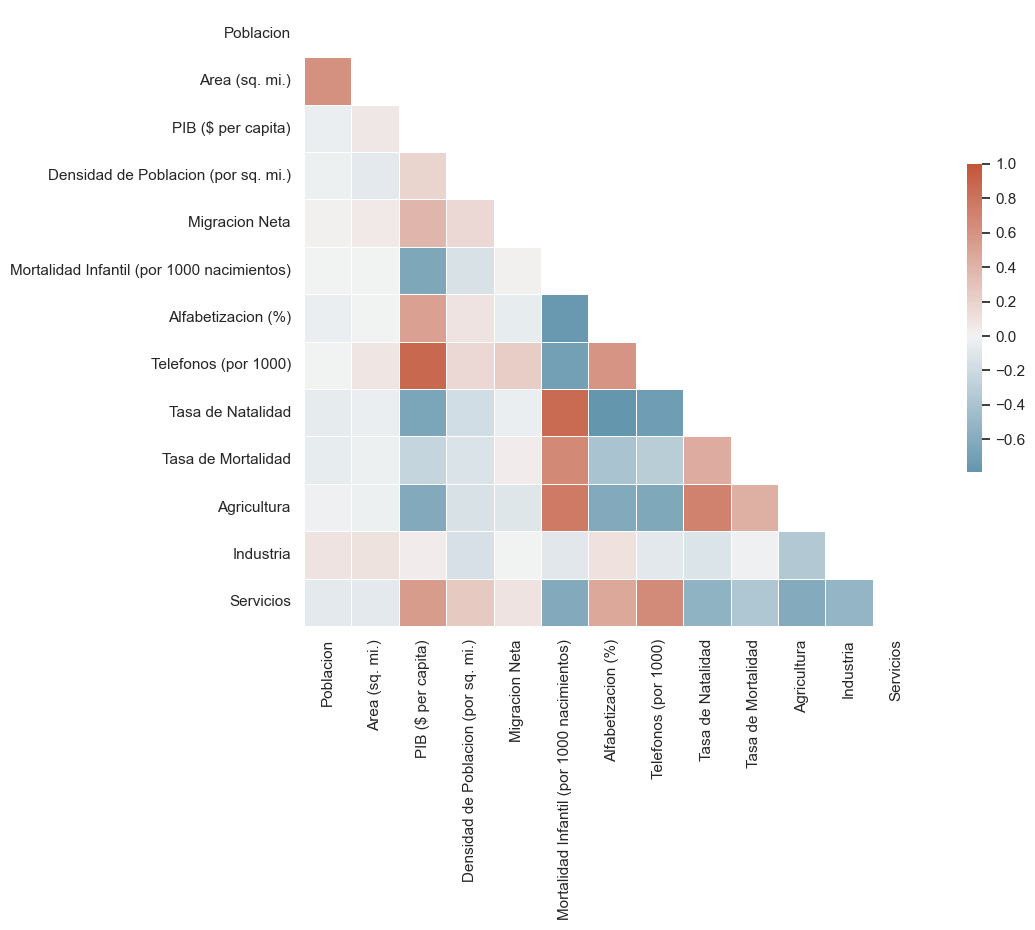

In [77]:
# Matriz de correlación
import seaborn as sns

sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(12, 8))

corr = np.round(df_.corr(), 2)
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=1,
    center=0,
    annot=True,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)

### Vemos de inmediato que los datos tienen valores medios **notablemente** diferentes. También podemos examinar la varianza de las cuatro variables:

In [78]:
df_

,Poblacion,Area (sq. mi.),PIB ($ per capita),Densidad de Poblacion (por sq. mi.),Migracion Neta,Mortalidad Infantil (por 1000 nacimientos),Alfabetizacion (%),Telefonos (por 1000),Tasa de Natalidad,Tasa de Mortalidad,Agricultura,Industria,Servicios
Pais,,,,,,,,,,,,,
Afghanistan,31056997,647500,700.0,48.0,23.06,163.07,36.0,3.2,46.60,20.34,0.380,0.240,0.380
Albania,3581655,28748,4500.0,124.6,-4.93,21.52,86.5,71.2,15.11,5.22,0.232,0.188,0.579
Algeria,32930091,2381740,6000.0,13.8,-0.39,31.00,70.0,78.1,17.14,4.61,0.101,0.600,0.298
Anguilla,13477,102,8600.0,132.1,10.76,21.03,95.0,460.0,14.17,5.34,0.040,0.180,0.780
Antigua & Barbuda,69108,443,11000.0,156.0,-6.15,19.46,89.0,549.9,16.93,5.37,0.038,0.220,0.743
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,25730435,912050,4800.0,28.2,-0.04,22.20,93.4,140.1,18.71,4.92,0.040,0.419,0.541
Vietnam,84402966,329560,2500.0,256.1,-0.45,25.95,90.3,187.7,16.86,6.22,0.209,0.410,0.381
Yemen,21456188,527970,800.0,40.6,0.00,61.50,50.2,37.2,42.89,8.30,0.135,0.472,0.393


In [79]:
df_.var()

Poblacion                                     1.736172e+16
Area (sq. mi.)                                1.947859e+12
PIB ($ per capita)                            9.300911e+07
Densidad de Poblacion (por sq. mi.)           1.902613e+06
Migracion Neta                                2.257405e+01
Mortalidad Infantil (por 1000 nacimientos)    1.249835e+03
Alfabetizacion (%)                            3.935279e+02
Telefonos (por 1000)                          4.415120e+04
Tasa de Natalidad                             1.274011e+02
Tasa de Mortalidad                            2.714496e+01
Agricultura                                   2.290464e-02
Industria                                     1.968679e-02
Servicios                                     2.744643e-02
dtype: float64

### Escalamos los datos -- debido a que estan en distinta escala

La función <span style="color: green;">scale</span> de <span style="color: green;">sklearn.preprocessing</span>:
- Estandariza las características, <span style="color: green;">restamos la media o promedio y escalamos a la varianza unitaria</span>
- Es equivalente a <span style="color: green;">(X - X.mean()) / X.std()</span>
- Convierte <span style="color: green;">DataFrame a N-dimensional array</span>

In [80]:
from sklearn.preprocessing import scale

# Funcion scale
X = scale(df_)

# La función scale es equivalente a:
# X = (df_ - np.mean(df_, axis=0)) / np.std(df_, axis=0)

X

array([[-0.02402789,  0.05986479, -0.87611209, ...,  1.47823878,
        -0.3432598 , -1.05630628],
       [-0.23313231, -0.38471982, -0.48098449, ...,  0.49758315,
        -0.7149083 ,  0.14824877],
       [-0.00977248,  1.30594788, -0.32501307, ..., -0.37042959,
         2.22969138, -1.55265559],
       ...,
       [-0.09709601, -0.0260197 , -0.86571399, ..., -0.14514384,
         1.3148643 , -0.97761675],
       [-0.17285349,  0.13539111, -0.86571399, ...,  0.41807053,
         0.01409453, -0.39652487],
       [-0.16726125, -0.12473692, -0.75133495, ...,  0.14640242,
        -0.32181854,  0.14824877]])

#### Validamos media o promedio

In [81]:
np.mean(X, axis=0)

array([ 9.92378123e-18, -4.96189061e-18, -9.42759216e-17, -2.97713437e-17,
        3.22522890e-17, -1.21566320e-16,  2.13361296e-16,  1.29009156e-16,
       -6.94664686e-17,  2.35689804e-16,  1.21566320e-16,  3.96951249e-17,
       -1.04199703e-16])

In [82]:
np.round(
    np.mean(X, axis=0),
    2
)

array([ 0., -0., -0., -0.,  0., -0.,  0.,  0., -0.,  0.,  0.,  0., -0.])

#### Validamos varianza

In [83]:
X_convertido_a_df = pd.DataFrame(X)
X_convertido_a_df.var()

0     1.005618
1     1.005618
2     1.005618
3     1.005618
4     1.005618
5     1.005618
6     1.005618
7     1.005618
8     1.005618
9     1.005618
10    1.005618
11    1.005618
12    1.005618
dtype: float64

### Centramos los datos -- restamos la media o promedio

In [84]:
X_centrado_2 = df_ - df_.mean()
X_centrado_2

,Poblacion,Area (sq. mi.),PIB ($ per capita),Densidad de Poblacion (por sq. mi.),Migracion Neta,Mortalidad Infantil (por 1000 nacimientos),Alfabetizacion (%),Telefonos (por 1000),Tasa de Natalidad,Tasa de Mortalidad,Agricultura,Industria,Servicios
Pais,,,,,,,,,,,,,
Afghanistan,-3.157153e+06,83317.0,-8425.698324,-246.805028,23.266536,124.171844,-45.944134,-204.951955,23.532514,10.87486,0.223095,-0.048028,-0.174508
Albania,-3.063249e+07,-535435.0,-4625.698324,-170.205028,-4.723464,-17.378156,4.555866,-136.951955,-7.957486,-4.24514,0.075095,-0.100028,0.024492
Algeria,-1.284059e+06,1817557.0,-3125.698324,-281.005028,-0.183464,-7.898156,-11.944134,-130.051955,-5.927486,-4.85514,-0.055905,0.311972,-0.256508
Anguilla,-3.420067e+07,-564081.0,-525.698324,-162.705028,10.966536,-17.868156,13.055866,251.848045,-8.897486,-4.12514,-0.116905,-0.108028,0.225492
Antigua & Barbuda,-3.414504e+07,-563740.0,1874.301676,-138.805028,-5.943464,-19.438156,7.055866,341.748045,-6.137486,-4.09514,-0.118905,-0.068028,0.188492
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,-8.483715e+06,347867.0,-4325.698324,-266.605028,0.166536,-16.698156,11.455866,-68.051955,-4.357486,-4.54514,-0.116905,0.130972,-0.013508
Vietnam,5.018882e+07,-234623.0,-6625.698324,-38.705028,-0.243464,-12.948156,8.355866,-20.451955,-6.207486,-3.24514,0.052095,0.121972,-0.173508
Yemen,-1.275796e+07,-36213.0,-8325.698324,-254.205028,0.206536,22.601844,-31.744134,-170.951955,19.822514,-1.16514,-0.021905,0.183972,-0.161508


#### Validamos media o promedio

In [85]:
X_centrado_2.mean()

Poblacion                                    -2.663895e-09
Area (sq. mi.)                                0.000000e+00
PIB ($ per capita)                           -1.625912e-12
Densidad de Poblacion (por sq. mi.)          -1.524293e-14
Migracion Neta                                9.923781e-17
Mortalidad Infantil (por 1000 nacimientos)   -4.961891e-15
Alfabetizacion (%)                            4.445854e-15
Telefonos (por 1000)                          2.921561e-14
Tasa de Natalidad                            -1.032073e-15
Tasa de Mortalidad                            1.151159e-15
Agricultura                                   1.550591e-17
Industria                                     4.341654e-18
Servicios                                    -1.364520e-17
dtype: float64

In [86]:
np.round(
    X_centrado_2.mean(),
    2
)

Poblacion                                    -0.0
Area (sq. mi.)                                0.0
PIB ($ per capita)                           -0.0
Densidad de Poblacion (por sq. mi.)          -0.0
Migracion Neta                                0.0
Mortalidad Infantil (por 1000 nacimientos)   -0.0
Alfabetizacion (%)                            0.0
Telefonos (por 1000)                          0.0
Tasa de Natalidad                            -0.0
Tasa de Mortalidad                            0.0
Agricultura                                   0.0
Industria                                     0.0
Servicios                                    -0.0
dtype: float64

#### Validamos varianza

In [87]:
X_centrado_2.var()

Poblacion                                     1.736172e+16
Area (sq. mi.)                                1.947859e+12
PIB ($ per capita)                            9.300911e+07
Densidad de Poblacion (por sq. mi.)           1.902613e+06
Migracion Neta                                2.257405e+01
Mortalidad Infantil (por 1000 nacimientos)    1.249835e+03
Alfabetizacion (%)                            3.935279e+02
Telefonos (por 1000)                          4.415120e+04
Tasa de Natalidad                             1.274011e+02
Tasa de Mortalidad                            2.714496e+01
Agricultura                                   2.290464e-02
Industria                                     1.968679e-02
Servicios                                     2.744643e-02
dtype: float64

### Validamos tipo de datos

In [88]:
type(df_)

pandas.core.frame.DataFrame

In [89]:
type(X)

numpy.ndarray

### Validamos la forma de arreglos

In [90]:
df_.shape

(179, 13)

In [91]:
X.shape

(179, 13)

### Visualicemos los datos de `X` en un dataframe

In [92]:
df_scaled = pd.DataFrame(X, index=df_.index, columns=df_.columns)
df_scaled

,Poblacion,Area (sq. mi.),PIB ($ per capita),Densidad de Poblacion (por sq. mi.),Migracion Neta,Mortalidad Infantil (por 1000 nacimientos),Alfabetizacion (%),Telefonos (por 1000),Tasa de Natalidad,Tasa de Mortalidad,Agricultura,Industria,Servicios
Pais,,,,,,,,,,,,,
Afghanistan,-0.024028,0.059865,-0.876112,-0.179430,4.910701,3.522194,-2.322517,-0.978132,2.090732,2.093127,1.478239,-0.343260,-1.056306
Albania,-0.233132,-0.384720,-0.480984,-0.123741,-0.996948,-0.492940,0.230303,-0.653602,-0.706978,-0.817079,0.497583,-0.714908,0.148249
Algeria,-0.009772,1.305948,-0.325013,-0.204294,-0.038722,-0.224035,-0.603787,-0.620672,-0.526624,-0.934488,-0.370430,2.229691,-1.552656
Anguilla,-0.260288,-0.405302,-0.054663,-0.118288,2.314628,-0.506839,0.659986,1.201943,-0.790492,-0.793982,-0.774619,-0.772085,1.364910
Antigua & Barbuda,-0.259865,-0.405057,0.194892,-0.100913,-1.254444,-0.551373,0.356680,1.630990,-0.545281,-0.788208,-0.787871,-0.486202,1.140947
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,-0.064566,0.249949,-0.449790,-0.193825,0.035150,-0.473651,0.579104,-0.324777,-0.387138,-0.874821,-0.774619,0.936069,-0.081767
Vietnam,0.381968,-0.168581,-0.688946,-0.028139,-0.051386,-0.367281,0.422396,-0.097607,-0.551500,-0.624605,0.345184,0.871745,-1.050253
Yemen,-0.097096,-0.026020,-0.865714,-0.184810,0.043592,0.641112,-1.604694,-0.815867,1.761119,-0.224259,-0.145144,1.314864,-0.977617


In [93]:
df_scaled

,Poblacion,Area (sq. mi.),PIB ($ per capita),Densidad de Poblacion (por sq. mi.),Migracion Neta,Mortalidad Infantil (por 1000 nacimientos),Alfabetizacion (%),Telefonos (por 1000),Tasa de Natalidad,Tasa de Mortalidad,Agricultura,Industria,Servicios
Pais,,,,,,,,,,,,,
Afghanistan,-0.024028,0.059865,-0.876112,-0.179430,4.910701,3.522194,-2.322517,-0.978132,2.090732,2.093127,1.478239,-0.343260,-1.056306
Albania,-0.233132,-0.384720,-0.480984,-0.123741,-0.996948,-0.492940,0.230303,-0.653602,-0.706978,-0.817079,0.497583,-0.714908,0.148249
Algeria,-0.009772,1.305948,-0.325013,-0.204294,-0.038722,-0.224035,-0.603787,-0.620672,-0.526624,-0.934488,-0.370430,2.229691,-1.552656
Anguilla,-0.260288,-0.405302,-0.054663,-0.118288,2.314628,-0.506839,0.659986,1.201943,-0.790492,-0.793982,-0.774619,-0.772085,1.364910
Antigua & Barbuda,-0.259865,-0.405057,0.194892,-0.100913,-1.254444,-0.551373,0.356680,1.630990,-0.545281,-0.788208,-0.787871,-0.486202,1.140947
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,-0.064566,0.249949,-0.449790,-0.193825,0.035150,-0.473651,0.579104,-0.324777,-0.387138,-0.874821,-0.774619,0.936069,-0.081767
Vietnam,0.381968,-0.168581,-0.688946,-0.028139,-0.051386,-0.367281,0.422396,-0.097607,-0.551500,-0.624605,0.345184,0.871745,-1.050253
Yemen,-0.097096,-0.026020,-0.865714,-0.184810,0.043592,0.641112,-1.604694,-0.815867,1.761119,-0.224259,-0.145144,1.314864,-0.977617


## PCA

### Encontramos los PCA's (componentes principales). Por default calcula con n = número de columnas originales

In [94]:
pca = PCA(random_state=1)
pca.fit_transform(df_scaled);

### Determinamos cuantos componentes usaremos

#### Con .explained_variance_ratio visualizamos la ganancia acumulada por cada CP (PCA)

##### Esto calcula la varianza explicada por cada componente

In [95]:
exp_var = pca.explained_variance_ratio_

In [96]:
exp_var

array([4.10580506e-01, 1.34962229e-01, 1.12615890e-01, 9.56885146e-02,
       7.06561742e-02, 5.34445544e-02, 3.60332389e-02, 3.15888089e-02,
       2.77138401e-02, 1.35872617e-02, 7.72629554e-03, 5.34937481e-03,
       5.33118854e-05])

##### Visualizamos la varianza explicada acumulada a medida que agregamos componentes

Text(0, 0.5, 'Varianza explicada acumulada')

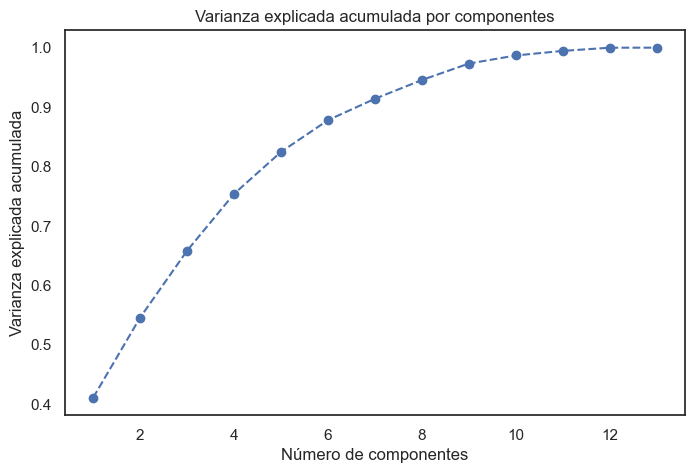

In [97]:
# range(1, 14)     ----> Cuenta de 1 a 13
# exp_var.cumsum() ----> Suma acumulada

plt.figure(figsize=(8, 5))
plt.plot(range(1, 14), exp_var.cumsum(), marker="o", linestyle="--")
plt.title("Varianza explicada acumulada por componentes")
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada acumulada")

##### Encontramos el número de componentes para explicar por lo menos el 60% de la varianza total

In [98]:
np.round(
    exp_var,
    2
)

array([0.41, 0.13, 0.11, 0.1 , 0.07, 0.05, 0.04, 0.03, 0.03, 0.01, 0.01,
       0.01, 0.  ])

In [99]:
list(enumerate(exp_var))

[(0, 0.41058050552380426),
 (1, 0.13496222893647586),
 (2, 0.11261589043141165),
 (3, 0.09568851460667172),
 (4, 0.0706561742494851),
 (5, 0.05344455439167122),
 (6, 0.03603323889640002),
 (7, 0.031588808936600626),
 (8, 0.027713840120040665),
 (9, 0.013587261674206586),
 (10, 0.007726295537386785),
 (11, 0.005349374810405365),
 (12, 5.3311885440064996e-05)]

In [100]:
sum = 0
for indice, value in enumerate(exp_var):
    print(indice, "---->", value)            
    sum = sum + value
    if sum > 0.60:
        print("Número de PC que explican al menos el 60% de la variación:", indice+1)
        break

0 ----> 0.41058050552380426
1 ----> 0.13496222893647586
2 ----> 0.11261589043141165
Número de PC que explican al menos el 60% de la variación: 3


### Cada componente principal es una combinación lineal de las características originales

#### Observaciones

Podemos observar que de las 13 características originales, redujimos el número de características a través de componentes principales a 3; estos componentes explican más del 60% de la varianza original.

Ahora veamos estos componentes principales como una combinación lineal de las características originales.

In [101]:
# (13, 13) representa los 13 componentes principales y las 13 columnas, respectivamente
pca.components_.shape

(13, 13)

In [102]:
np.round(
    pca.components_[:3, :],  # 3 componentes principales y todas las columnas
    2
)

array([[ 0.  , -0.01, -0.35, -0.1 , -0.06,  0.4 , -0.34, -0.37,  0.39,
         0.24,  0.36, -0.01, -0.32],
       [ 0.55,  0.56, -0.01, -0.21, -0.04, -0.04,  0.06, -0.04, -0.09,
        -0.05, -0.11,  0.47, -0.29],
       [ 0.35,  0.39,  0.2 ,  0.27,  0.46,  0.16, -0.21,  0.18,  0.1 ,
         0.16,  0.15, -0.43,  0.23]])

In [103]:
pc_comps = ["PC1", "PC2", "PC3"]
data_pca = pd.DataFrame(
    np.round(pca.components_[:3, :], 2), columns=df_scaled.columns, index=pc_comps
)
data_pca

,Poblacion,Area (sq. mi.),PIB ($ per capita),Densidad de Poblacion (por sq. mi.),Migracion Neta,Mortalidad Infantil (por 1000 nacimientos),Alfabetizacion (%),Telefonos (por 1000),Tasa de Natalidad,Tasa de Mortalidad,Agricultura,Industria,Servicios
PC1,0.00,-0.01,-0.35,-0.10,-0.06,0.40,-0.34,-0.37,0.39,0.24,0.36,-0.01,-0.32
PC2,0.55,0.56,-0.01,-0.21,-0.04,-0.04,0.06,-0.04,-0.09,-0.05,-0.11,0.47,-0.29
PC3,0.35,0.39,0.20,0.27,0.46,0.16,-0.21,0.18,0.10,0.16,0.15,-0.43,0.23


In [104]:
data_pca.T

,PC1,PC2,PC3
Poblacion,0.00,0.55,0.35
Area (sq. mi.),-0.01,0.56,0.39
PIB ($ per capita),-0.35,-0.01,0.20
Densidad de Poblacion (por sq. mi.),-0.10,-0.21,0.27
Migracion Neta,-0.06,-0.04,0.46
Mortalidad Infantil (por 1000 nacimientos),0.40,-0.04,0.16
Alfabetizacion (%),-0.34,0.06,-0.21
Telefonos (por 1000),-0.37,-0.04,0.18
Tasa de Natalidad,0.39,-0.09,0.10
Tasa de Mortalidad,0.24,-0.05,0.16


In [105]:
def color_high(val):
    if val <= -0.35:  # Puedes decidir cualquier valor según tu comprensión.
        return "background: pink; color: black;"
    elif val >= 0.35:
        return "background: skyblue; color: black;"


data_pca.T.style.applymap(color_high)

,PC1,PC2,PC3
Poblacion,0.000000,0.550000,0.350000
Area (sq. mi.),-0.010000,0.560000,0.390000
PIB ($ per capita),-0.350000,-0.010000,0.200000
Densidad de Poblacion (por sq. mi.),-0.100000,-0.210000,0.270000
Migracion Neta,-0.060000,-0.040000,0.460000
Mortalidad Infantil (por 1000 nacimientos),0.400000,-0.040000,0.160000
Alfabetizacion (%),-0.340000,0.060000,-0.210000
Telefonos (por 1000),-0.370000,-0.040000,0.180000
Tasa de Natalidad,0.390000,-0.090000,0.100000
Tasa de Mortalidad,0.240000,-0.050000,0.160000


#### Observaciones (continuacion)

- Cada componente principal es una combinación lineal de las características originales.
- Por ejemplo, podemos escribir la ecuación para PC1 de la siguiente manera:

     0.00 -- Poblacion <span style="color: red;">+</span> \
    -0.01 -- Area <span style="color: red;">+</span> \
    -0.35 -- PIB ($per capita) <span style="color: red;">+</span> \
    -0.10 -- Densidad de Poblacion (por sq. mi.) <span style="color: red;">+</span> \
    -0.06 -- Migracion Neta <span style="color: red;">+</span> \
     0.40 -- Mortalidad Infantil (por 1000 nacimientos) <span style="color: red;">+</span> \
    -0.34 -- Alfabetizacion (%) <span style="color: red;">+</span> \
    -0.37 -- Telefonos (por 1000) <span style="color: red;">+</span> \
     0.39 -- Tasa de Natalidad <span style="color: red;">+</span> \
     0.24 -- Tasa de Mortalidad	<span style="color: red;">+</span> \
     0.36 -- Agricultura <span style="color: red;">+</span> \
    -0.01 -- Industria <span style="color: red;">+</span> \
    -0.32 -- Servicios

- El primer componente principal, PC1, es una medida de PIB, Mortalidad Infantil, Telefonos, Tasa de Natalidad y Agricultura. PC1 está asociado con puntuaciones altas en todas estas variables, excepto PIB y Telefonos, ya que estas variables tienen pesos negativos. PC1 está asociado con valores bajos de PIB.
- El segundo componente principal, PC2, es una medida de Poblacion, Area y además Industria. PC2 está asociado con valores altos de Area y Poblacion.
- El tercer componente principal, PC3, es una medida Migracion Neta y además de valores bajos de Industria

#### Comentario

- Usamos la función `PCA()` de `sklearn` para calcular los vectores de cargas *(loadings)*, es decir, los coeficientes que cada variable aporta a cada uno de los componentes principales. Una vez ajustado el modelo, los vectores de cargas *(loadings)* pueden recuperarse con el atributo `components_`

### Aplicacion real de PCA

#### Usando sklearn solo para retener los 3 primeros PCA

In [106]:
pca = PCA(random_state=1, n_components=3)
data_transformada = pca.fit_transform(df_scaled)

#### Visualizamos los puntajes para los primeros componentes

In [107]:
df_plot = pd.DataFrame(
    data_transformada, columns=["PC1", "PC2", "PC3"], index=df_.index
)
df_plot

,PC1,PC2,PC3
Pais,,,
Afghanistan,4.779176,-0.705227,3.585320
Albania,-0.114963,-0.543545,-0.842037
Algeria,0.379654,2.414557,-1.235054
Anguilla,-2.202520,-0.991914,1.084476
Antigua & Barbuda,-1.974143,-0.694865,-0.506256
...,...,...,...
Venezuela,-0.722292,0.846955,-1.030507
Vietnam,0.079618,0.937317,-0.984295
Yemen,2.309323,0.671120,-0.628200


In [108]:
df_plot.reset_index(inplace=True)
df_plot["Region"] = df["Region"]
df_plot.head(20)

,Pais,PC1,PC2,PC3,Region
0,Afghanistan,4.779176,-0.705227,3.585320,ASIA (EX. NEAR EAST)
1,Albania,-0.114963,-0.543545,-0.842037,EASTERN EUROPE
2,Algeria,0.379654,2.414557,-1.235054,NORTHERN AFRICA
3,Anguilla,-2.202520,-0.991914,1.084476,LATIN AMER. & CARIB
4,Antigua & Barbuda,-1.974143,-0.694865,-0.506256,LATIN AMER. & CARIB
5,Argentina,-1.086977,1.374616,0.027350,LATIN AMER. & CARIB
6,Armenia,-0.114624,0.280905,-1.664288,C.W. OF IND. STATES
7,Aruba,-3.004155,-0.181165,-0.197751,LATIN AMER. & CARIB
8,Australia,-3.196335,2.659319,2.660982,OCEANIA
9,Austria,-2.928602,-0.225152,0.152732,WESTERN EUROPE


##### Visualizamos en 3D

In [109]:
# Visualizamos en 3D
import plotly.express as px

px.scatter_3d(
    df_plot.dropna(),
    x="PC1",
    y="PC2",
    z="PC3",
    height=700,
    text="Pais",
    color="Region",
)

##### Visualizamos en 2D

In [110]:
# Visualizamos en 2D
import plotly.express as px

px.scatter(
    df_plot.dropna(),
    x="PC1",
    y="PC2",
    height=700,
    text="Pais",
    color="Region",
)

# (3) PCA Para visualizar datos - Breast Cancer

## Enlaces utiles

- [Kaggle](https://www.kaggle.com/)
    - [Kaggle - Paises del mundo](https://www.kaggle.com/datasets/fernandol/countries-of-the-world)
- [Scikit-learn](https://scikit-learn.org/stable/)
    - [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
- [Plotly](https://plotly.com/graphing-libraries/)

## Notas

## Tratamiento e Imputacion de Datos

### Eliminamos archivos

In [111]:
import os
ruta = '3 DataCreada/'
for archivo in os.listdir(ruta):
    if archivo.startswith('breast_cancer'):
        os.remove(os.path.join(ruta, archivo))

### Guardamos archivo original

In [112]:
data_original = pd.read_csv(
    "https://raw.githubusercontent.com/CristhianCastro25/Data_analytics/main/Sesion_5/data_breast_cancer_m.csv"
)
data_original.to_csv("3 DataCreada/breast_cancer_ORIGINAL.csv", sep=";")

In [113]:
data_original.shape

(569, 31)

### Obtenemos dataframe

In [114]:
data = pd.read_csv(
    "https://raw.githubusercontent.com/CristhianCastro25/Data_analytics/main/Sesion_5/data_breast_cancer_m.csv"
)

### Cambiamos nombre de columnas a español sin tildes

In [115]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst',
       'Unnamed: 32'],
      dtype='object')

In [116]:
nuevos_nombres = [
    "id",
    "diagnostico",
    "radio_medio",
    "textura_medio",
    "perimetro_medio",
    "area_medio",
    "suavidad_medio",
    "compacidad_medio",
    "concavidad_medio",
    "simetria_medio",
    "dimension_fractal_medio",
    "radio_se",
    "textura_se",
    "perimetro_se",
    "area_se",
    "suavidad_se",
    "compacidad_se",
    "concavidad_se",
    "puntos_concavos_se",
    "simetria_se",
    "dimension_fractal_se",
    "radio_peor",
    "textura_peor",
    "area_peor",
    "suavidad_peor",
    "compacidad_peor",
    "concavidad_peor",
    "puntos_concavos_peor",
    "simetria_peor",
    "dimension_fractal_peor",
    "Unnamed: 32",  # Hay una columna sin data
]
data.columns = nuevos_nombres

<span style="color: yellow;">

#### Explicacion de columnas

- id: Identificador único de cada registro.
- diagnostico: Diagnóstico de cáncer (M = maligno, B = benigno).

--

- radio_medio: Media del radio de la célula.
- textura_medio: Media de la textura de la célula.
- perimetro_medio: Media del perímetro de la célula.
- area_medio: Media del área de la célula.
- suavidad_medio: Media de la suavidad de la célula.
- compacidad_medio: Media de la compacidad de la célula.
- concavidad_medio: Media de la concavidad de la célula.
- simetria_medio: Media de la simetría de la célula.
- dimension_fractal_medio: Media de la dimensión fractal de la célula.

--

- radio_se: Error estándar del radio de la célula.
- textura_se: Error estándar de la textura de la célula.
- perimetro_se: Error estándar del perímetro de la célula.
- area_se: Error estándar del área de la célula.
- suavidad_se: Error estándar de la suavidad de la célula.
- compacidad_se: Error estándar de la compacidad de la célula.
- concavidad_se: Error estándar de la concavidad de la célula.
- puntos_concavos_se: Error estándar de los puntos cóncavos de la célula.
- simetria_se: Error estándar de la simetría de la célula.
- dimension_fractal_se: Error estándar de la dimensión fractal de la célula.

--

- radio_peor: Peor valor del radio de la célula.
- textura_peor: Peor valor de la textura de la célula.
- area_peor: Peor valor del área de la célula.
- suavidad_peor: Peor valor de la suavidad de la célula.
- compacidad_peor: Peor valor de la compacidad de la célula.
- concavidad_peor: Peor valor de la concavidad de la célula.
- puntos_concavos_peor: Peor valor de los puntos cóncavos de la célula.
- simetria_peor: Peor valor de la simetría de la célula.
- dimension_fractal_peor: Peor valor de la dimensión fractal de la célula.

</span>

### Verificamos dataframe

In [117]:
data.head()

,id,diagnostico,radio_medio,textura_medio,perimetro_medio,area_medio,suavidad_medio,compacidad_medio,concavidad_medio,simetria_medio,...,radio_peor,textura_peor,area_peor,suavidad_peor,compacidad_peor,concavidad_peor,puntos_concavos_peor,simetria_peor,dimension_fractal_peor,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,...,25.38,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,...,24.99,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,...,23.57,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,...,14.91,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,...,22.54,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [118]:
data.shape

(569, 31)

#### Guardamos archivo modificado

In [119]:
# Esperar un segundo
import time
time.sleep(1)

# Obtener fecha y hora con segundos
import datetime
current_time = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# Guardamos archivo modificado
data.to_csv(f'3 DataCreada/breast_cancer_MODIFICADO_{current_time}.csv', sep=';')

## Analisis de Datos

### Shape

In [120]:
data.shape

(569, 31)

### Cantidad de valores nulos

In [121]:
data.isna().sum()

id                           0
diagnostico                  0
radio_medio                  0
textura_medio                0
perimetro_medio              0
area_medio                   0
suavidad_medio               0
compacidad_medio             0
concavidad_medio             0
simetria_medio               0
dimension_fractal_medio      0
radio_se                     0
textura_se                   0
perimetro_se                 0
area_se                      0
suavidad_se                  0
compacidad_se                0
concavidad_se                0
puntos_concavos_se           0
simetria_se                  0
dimension_fractal_se         0
radio_peor                   0
textura_peor                 0
area_peor                    0
suavidad_peor                0
compacidad_peor              0
concavidad_peor              0
puntos_concavos_peor         0
simetria_peor                0
dimension_fractal_peor       0
Unnamed: 32                569
dtype: int64

### Afirmacion: diagnostico

In [122]:
data['diagnostico'].value_counts()

diagnostico
B    357
M    212
Name: count, dtype: int64

### Afirmacion: compacidad_medio

La "compacidad de la célula" es una medida que describe qué tan compacta es la forma de una célula. En el contexto del código que proporcionaste, se está creando un histograma para visualizar la distribución de la variable "compacidad_medio" en el conjunto de datos, diferenciando por el diagnóstico de las células. La opción `kde=True` agrega una estimación de la densidad kernel a la visualización.

En la imagen se observa un histograma con una estimación de densidad kernel (KDE) que compara la distribución de la compacidad media de células para dos diagnósticos: maligno (M) y benigno (B). Se puede notar que las células con diagnóstico maligno tienden a tener una mayor compacidad media en comparación con las benignas, indicado por el desplazamiento hacia la derecha del pico en la curva naranja (M) respecto a la azul (B). Esto sugiere que una mayor compacidad media podría estar asociada con características malignas en las células.

<Axes: xlabel='compacidad_medio', ylabel='Count'>

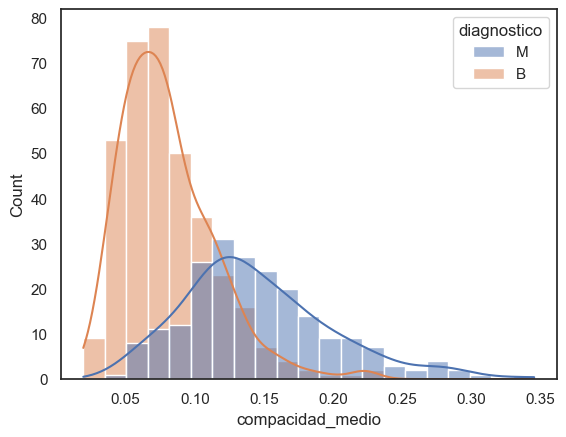

In [123]:
sns.histplot(data=data, x="compacidad_medio", hue="diagnostico", kde=True)

### Afirmacion: concavidad_medio

La "concavidad de la célula" se refiere a la severidad de las porciones cóncavas del contorno de una célula. En el contexto del código que proporcionaste, se está utilizando un histograma para visualizar la distribución de la variable "concavidad_medio" en el conjunto de datos, diferenciando por el diagnóstico de las células (maligno o benigno). La opción `kde=True` añade una estimación de la densidad kernel para suavizar la visualización del histograma, lo que ayuda a entender mejor la distribución de la concavidad en las células según el diagnóstico.

La imagen muestra un histograma con una estimación de densidad kernel (KDE) que compara la distribución de la "concavidad media" de células para dos diagnósticos: maligno (M) y benigno (B). Se observa que las células con diagnóstico maligno tienden a tener valores más altos de concavidad media, como se indica por el pico más alto y desplazado hacia la derecha en la curva naranja. Esto sugiere que una mayor concavidad media podría estar asociada con características malignas en las células.

<Axes: xlabel='concavidad_medio', ylabel='Count'>

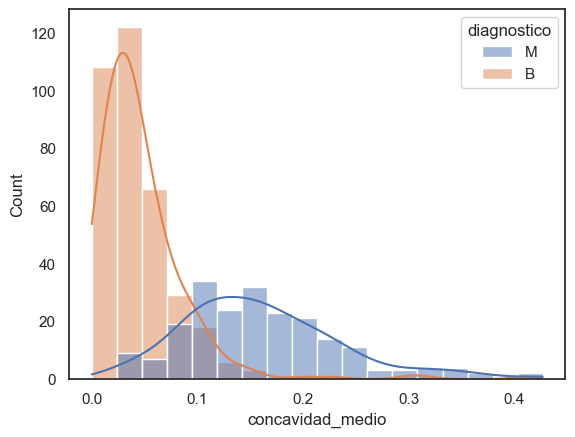

In [124]:
sns.histplot(data=data, x="concavidad_medio", hue="diagnostico", kde=True)

### Afirmacion: radio_peor

El "radio de una célula" se refiere a la medida del radio típico de una célula, que es una característica comúnmente analizada en estudios de imágenes médicas, especialmente en el contexto de diagnósticos médicos como el cáncer. En el código que proporcionaste, se está utilizando un histograma para visualizar la distribución de la variable "radio_peor" en el conjunto de datos, diferenciando por el diagnóstico de las células (maligno o benigno). La opción `kde=True` añade una estimación de la densidad kernel para suavizar la visualización del histograma, lo que ayuda a entender mejor la distribución del radio en las células según el diagnóstico.

La imagen muestra un histograma con una estimación de densidad kernel (KDE) que compara la distribución del "radio peor" de células para dos diagnósticos: maligno (M) y benigno (B). Se observa que las células con diagnóstico maligno tienden a tener un radio mayor, como se indica por el pico más alto y desplazado hacia la derecha en la curva naranja. Esto sugiere que un radio mayor podría estar asociado con características malignas en las células.

<Axes: xlabel='radio_peor', ylabel='Count'>

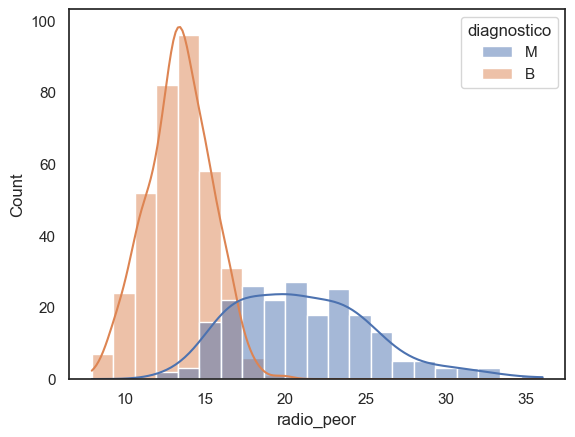

In [125]:
sns.histplot(data=data, x="radio_peor", hue="diagnostico", kde=True)

## PCA

### Verificamos dataframe

In [126]:
data.head()

,id,diagnostico,radio_medio,textura_medio,perimetro_medio,area_medio,suavidad_medio,compacidad_medio,concavidad_medio,simetria_medio,...,radio_peor,textura_peor,area_peor,suavidad_peor,compacidad_peor,concavidad_peor,puntos_concavos_peor,simetria_peor,dimension_fractal_peor,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,...,25.38,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,...,24.99,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,...,23.57,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,...,14.91,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,...,22.54,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [127]:
data.shape

(569, 31)

#### Guardamos archivo modificado

- No se hizo ningun cambio en el dataframe

### Eliminamos columnas id, diagnostico, Unamed: 32 <span style="color: green;">(Solo nos quedamos con la data numerica)</span>

In [128]:
X_ = data.drop(["id", "diagnostico", "Unnamed: 32"], axis=1)

In [129]:
X_

,radio_medio,textura_medio,perimetro_medio,area_medio,suavidad_medio,compacidad_medio,concavidad_medio,simetria_medio,dimension_fractal_medio,radio_se,...,dimension_fractal_se,radio_peor,textura_peor,area_peor,suavidad_peor,compacidad_peor,concavidad_peor,puntos_concavos_peor,simetria_peor,dimension_fractal_peor
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.2419,0.07871,1.0950,...,0.006193,25.380,17.33,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.1812,0.05667,0.5435,...,0.003532,24.990,23.41,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.2069,0.05999,0.7456,...,0.004571,23.570,25.53,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.2597,0.09744,0.4956,...,0.009208,14.910,26.50,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.1809,0.05883,0.7572,...,0.005115,22.540,16.67,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.1726,0.05623,1.1760,...,0.004239,25.450,26.40,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.1752,0.05533,0.7655,...,0.002498,23.690,38.25,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.1590,0.05648,0.4564,...,0.003892,18.980,34.12,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.2397,0.07016,0.7260,...,0.006185,25.740,39.42,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Escalamos los datos -- debido a que estan en distinta escala

In [130]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_)
scaled_data = scaler.transform(X_)

In [131]:
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

#### Validamos media o promedio

In [132]:
np.mean(scaled_data, axis=0)

array([-1.37363271e-16,  6.86816353e-17, -1.24875700e-16, -2.18532476e-16,
       -8.36667193e-16,  1.87313551e-16,  4.99502802e-17,  1.74825981e-16,
        4.74527662e-16,  2.37263831e-16, -1.12388130e-16, -1.12388130e-16,
       -1.31119486e-16, -1.52972733e-16,  1.74825981e-16,  1.62338411e-16,
        0.00000000e+00,  8.74129903e-17, -6.24378502e-18, -8.24179623e-16,
        1.24875700e-17,  0.00000000e+00, -2.37263831e-16, -3.37164391e-16,
        7.49254203e-17,  2.24776261e-16,  2.62238971e-16, -5.74428222e-16])

In [133]:
np.round(
    np.mean(scaled_data, axis=0),
    2
)

array([-0.,  0., -0., -0., -0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0.,
       -0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0., -0., -0.,  0.,  0.,
        0., -0.])

#### Validamos varianza

In [134]:
scaled_data_convertido_a_df = pd.DataFrame(X)
scaled_data_convertido_a_df.var()

0     1.005618
1     1.005618
2     1.005618
3     1.005618
4     1.005618
5     1.005618
6     1.005618
7     1.005618
8     1.005618
9     1.005618
10    1.005618
11    1.005618
12    1.005618
dtype: float64

### PCA

#### Encontramos los PCA's (componentes principales). Por default calcula con n = número de columnas originales

In [135]:
pca = PCA(random_state=1)
data_transformada = pca.fit_transform(scaled_data);

#### Determinamos cuantos componentes usaremos

##### Esto calcula la varianza explicada por cada componente

In [136]:
exp_var = pca.explained_variance_ratio_
exp_var

array([4.17192925e-01, 1.93605260e-01, 1.00263675e-01, 7.03946082e-02,
       5.87642939e-02, 4.30014907e-02, 2.35999324e-02, 1.66393475e-02,
       1.44430756e-02, 1.24835440e-02, 1.04285704e-02, 9.31295081e-03,
       8.41003268e-03, 5.30128752e-03, 3.20469839e-03, 2.35730768e-03,
       2.01870518e-03, 1.76128490e-03, 1.66027706e-03, 1.07349692e-03,
       1.05903291e-03, 8.71634570e-04, 7.89460690e-04, 5.91719748e-04,
       5.09439625e-04, 2.29830271e-04, 2.67835326e-05, 5.33413008e-06])

##### Visualizamos la varianza explicada acumulada a medida que agregamos componentes

Text(0, 0.5, 'Varianza explicada acumulada')

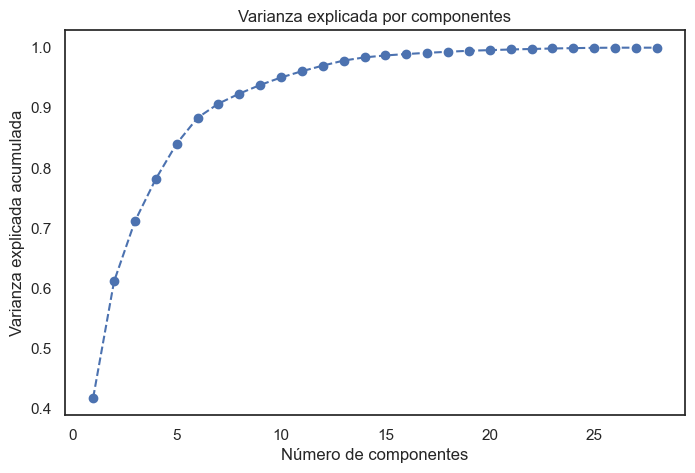

In [137]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 29), exp_var.cumsum(), marker="o", linestyle="--")
plt.title("Varianza explicada por componentes")
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada acumulada")

#### Cada componente principal es una combinación lineal de las características originales

In [138]:
pc_comps = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6"]
data_pca = pd.DataFrame(
    np.round(pca.components_[:6, :], 2), columns=X_.columns, index=pc_comps
)
data_pca.T

,PC1,PC2,PC3,PC4,PC5,PC6
radio_medio,0.22,-0.26,-0.02,0.05,0.03,0.02
textura_medio,0.11,-0.08,0.06,-0.60,-0.04,-0.03
perimetro_medio,0.23,-0.25,-0.02,0.05,0.03,0.02
area_medio,0.22,-0.26,0.02,0.06,0.01,-0.00
suavidad_medio,0.16,0.18,-0.10,0.15,-0.37,-0.29
compacidad_medio,0.26,0.13,-0.08,0.04,0.01,-0.02
concavidad_medio,0.28,0.03,-0.00,0.03,0.08,-0.01
simetria_medio,0.16,0.18,-0.04,0.07,-0.31,0.35
dimension_fractal_medio,0.09,0.37,-0.01,0.05,-0.05,-0.12
radio_se,0.22,-0.14,0.26,0.10,-0.16,-0.03


In [139]:
def color_high(val):
    if val <= -0.25:  # Puedes decidir cualquier valor según tu comprensión.
        return "background: pink; color: black;"
    elif val >= 0.25:
        return "background: skyblue; color: black;"


data_pca.T.style.applymap(color_high)

,PC1,PC2,PC3,PC4,PC5,PC6
radio_medio,0.220000,-0.260000,-0.020000,0.050000,0.030000,0.020000
textura_medio,0.110000,-0.080000,0.060000,-0.600000,-0.040000,-0.030000
perimetro_medio,0.230000,-0.250000,-0.020000,0.050000,0.030000,0.020000
area_medio,0.220000,-0.260000,0.020000,0.060000,0.010000,-0.000000
suavidad_medio,0.160000,0.180000,-0.100000,0.150000,-0.370000,-0.290000
compacidad_medio,0.260000,0.130000,-0.080000,0.040000,0.010000,-0.020000
concavidad_medio,0.280000,0.030000,-0.000000,0.030000,0.080000,-0.010000
simetria_medio,0.160000,0.180000,-0.040000,0.070000,-0.310000,0.350000
dimension_fractal_medio,0.090000,0.370000,-0.010000,0.050000,-0.050000,-0.120000
radio_se,0.220000,-0.140000,0.260000,0.100000,-0.160000,-0.030000


#### Aplicacion real de PCA

##### Usando sklearn solo para retener los 3 primeros PCA

In [140]:
pca = PCA(random_state=1, n_components=8)
data_transformada = pca.fit_transform(scaled_data)

##### Visualizamos los puntajes para los primeros componentes

In [141]:
df_plot = pd.DataFrame(
    data_transformada,
    columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8"],
    index=data["diagnostico"],
).reset_index()
df_plot.head()

,diagnostico,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,M,8.611860,1.601749,-1.094583,3.655837,-1.285394,1.348616,2.175266,-0.262696
1,M,1.805294,-3.731453,-0.577716,1.167632,0.585399,0.006297,-0.036365,0.240447
2,M,5.145653,-1.336414,-0.590995,0.913135,-0.179749,0.558965,-0.624578,0.127042
3,M,7.774924,9.712423,-3.142328,0.155246,-3.010535,2.999856,1.418539,1.314468
4,M,3.356233,-2.068131,1.378014,2.929944,0.519672,-1.226049,-0.976012,0.607133


In [142]:
conteo_diagnostico = df_plot['diagnostico'].value_counts()
conteo_diagnostico

diagnostico
B    357
M    212
Name: count, dtype: int64

In [143]:
df_plot['conteo'] = df_plot['diagnostico'].map(conteo_diagnostico)
df_plot['test'] = 'test'
df_plot.head()

,diagnostico,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,conteo,test
0,M,8.611860,1.601749,-1.094583,3.655837,-1.285394,1.348616,2.175266,-0.262696,212,test
1,M,1.805294,-3.731453,-0.577716,1.167632,0.585399,0.006297,-0.036365,0.240447,212,test
2,M,5.145653,-1.336414,-0.590995,0.913135,-0.179749,0.558965,-0.624578,0.127042,212,test
3,M,7.774924,9.712423,-3.142328,0.155246,-3.010535,2.999856,1.418539,1.314468,212,test
4,M,3.356233,-2.068131,1.378014,2.929944,0.519672,-1.226049,-0.976012,0.607133,212,test


###### Visualizamos en 2D

In [144]:
# Visualizamos en 2D
import plotly.express as px

px.scatter(
    df_plot.dropna(),
    x="PC1",
    y="PC2",
    height=600,
    width=800,
    color="diagnostico",
    hover_data=["conteo", "test"],
)

###### Visualizamos en 3D

In [145]:
# Visualizamos en 3D
px.scatter_3d(
    df_plot.dropna(),
    x="PC1",
    y="PC2",
    z="PC3",
    height=700,
    width=900,
    color="diagnostico",
    hover_data=["conteo", "test"],
)

In [146]:
df_plot

,diagnostico,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,conteo,test
0,M,8.611860,1.601749,-1.094583,3.655837,-1.285394,1.348616,2.175266,-0.262696,212,test
1,M,1.805294,-3.731453,-0.577716,1.167632,0.585399,0.006297,-0.036365,0.240447,212,test
2,M,5.145653,-1.336414,-0.590995,0.913135,-0.179749,0.558965,-0.624578,0.127042,212,test
3,M,7.774924,9.712423,-3.142328,0.155246,-3.010535,2.999856,1.418539,1.314468,212,test
4,M,3.356233,-2.068131,1.378014,2.929944,0.519672,-1.226049,-0.976012,0.607133,212,test
...,...,...,...,...,...,...,...,...,...,...,...
564,M,5.598554,-3.906983,2.375882,1.155237,-0.057095,-2.358200,-0.609028,-0.122744,212,test
565,M,3.167397,-3.746856,2.001112,-2.524363,-0.454536,-0.210212,-0.614972,-1.110447,212,test
566,M,1.078526,-1.973040,0.498708,-2.039951,1.836652,-0.517481,-0.223501,0.296052,212,test
567,M,9.835313,1.170907,-1.927167,-2.310658,-0.015461,0.574341,0.280824,-0.169454,212,test


---

## LogisticRegression

### Funcion

In [147]:
# ML con todas las variables disponibles
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Importing metrics for evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Accuracy score
from sklearn.metrics import accuracy_score

def evaluar_modelo(model, X_train, X_test, y_train, y_test):
    # Paso 1: Crear clasificador
    classifier = model

    # Paso 2: Entrenar
    classifier.fit(X_train, y_train)

    # Paso 3: Predice en Train y Test
    y_pred_train = classifier.predict(X_train)
    y_pred_test = classifier.predict(X_test)

    # Paso 4: Evaluamos en Train y Test
    print("Reporte de Clasificación en Train")
    print("-" * 60)
    print(classification_report(y_train, y_pred_train))
    print("")
    print("Reporte de Clasificación en Test")
    print("-" * 60)
    print(classification_report(y_test, y_pred_test))
    
    # Matriz de confusion    
    print("")
    print("Matriz de confusion")
    print(confusion_matrix(y_test, y_pred_test))

    # Puntuacion de precision o porcentaje de aciertos
    print("")
    print("Accuracy en Train", accuracy_score(y_pred_train, y_train))
    print("Accuracy en Test", accuracy_score(y_pred_test, y_test))

### Eliminamos columnas id, diagnostico, Unamed: 32 (Nos quedamos con datos numericos)

In [148]:
X = data.drop(["id", "diagnostico", "Unnamed: 32"], axis=1)
y = data["diagnostico"]

In [149]:
X

,radio_medio,textura_medio,perimetro_medio,area_medio,suavidad_medio,compacidad_medio,concavidad_medio,simetria_medio,dimension_fractal_medio,radio_se,...,dimension_fractal_se,radio_peor,textura_peor,area_peor,suavidad_peor,compacidad_peor,concavidad_peor,puntos_concavos_peor,simetria_peor,dimension_fractal_peor
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.2419,0.07871,1.0950,...,0.006193,25.380,17.33,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.1812,0.05667,0.5435,...,0.003532,24.990,23.41,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.2069,0.05999,0.7456,...,0.004571,23.570,25.53,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.2597,0.09744,0.4956,...,0.009208,14.910,26.50,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.1809,0.05883,0.7572,...,0.005115,22.540,16.67,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.1726,0.05623,1.1760,...,0.004239,25.450,26.40,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.1752,0.05533,0.7655,...,0.002498,23.690,38.25,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.1590,0.05648,0.4564,...,0.003892,18.980,34.12,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.2397,0.07016,0.7260,...,0.006185,25.740,39.42,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [150]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnostico, Length: 569, dtype: object

### Dividimos los datos en train y test (30% para test)

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Escalamos los datos -- debido a que estan en distinta escala

In [152]:
# # Una buena práctica es estandarizar los valores. Usaremos standart scaler
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [153]:
# Una buena práctica es estandarizar los valores. Usaremos standart scaler
from sklearn.preprocessing import LabelEncoder, StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [154]:
# classifier = DecisionTreeClassifier(max_depth=5)
classifier = LogisticRegression()
evaluar_modelo(classifier, X_train, X_test, y_train, y_test)

Reporte de Clasificación en Train
------------------------------------------------------------
              precision    recall  f1-score   support

           B       0.98      1.00      0.99       249
           M       1.00      0.97      0.99       149

    accuracy                           0.99       398
   macro avg       0.99      0.99      0.99       398
weighted avg       0.99      0.99      0.99       398


Reporte de Clasificación en Test
------------------------------------------------------------
              precision    recall  f1-score   support

           B       0.98      0.98      0.98       108
           M       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171


Matriz de confusion
[[106   2]
 [  2  61]]

Accuracy en Train 0.9899497487437185
Accuracy en Test 0.9766081871345029


# (Optional) T-SNE MNIST

In [ ]:
from sklearn import datasets, svm, metrics

digits = datasets.load_digits()

In [ ]:
digits["data"].shape

In [ ]:
digits["images"].shape

In [ ]:
digits["target"]

In [ ]:
data = pd.DataFrame(digits["data"])
data["target"] = digits["target"]

In [ ]:
data.shape

In [ ]:
data.head()

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(8, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [ ]:
data.drop("target", axis=1).values

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

train = StandardScaler().fit_transform(data.drop("target", axis=1).values)
pca = PCA(n_components=2)
pca_res = pca.fit_transform(data.drop("target", axis=1).values)

In [ ]:
import seaborn as sns

sns.scatterplot(
    x=pca_res[:, 0],
    y=pca_res[:, 1],
    hue=digits["target"],
    palette=sns.hls_palette(10),
    legend="full",
)

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
tsne_res = tsne.fit_transform(data.drop("target", axis=1).values)

sns.scatterplot(
    x=tsne_res[:, 0],
    y=tsne_res[:, 1],
    hue=digits["target"],
    palette=sns.hls_palette(10),
    legend="full",
)

In [ ]:
# En 3 dimensiones
tsne = TSNE(n_components=3, random_state=0)
tsne_res = tsne.fit_transform(data.drop("target", axis=1).values)

In [ ]:
tsne_df = pd.DataFrame(columns=["comp1", "comp2", "comp3"])

tsne_df["comp1"] = tsne_res[:, 0]
tsne_df["comp2"] = tsne_res[:, 1]
tsne_df["comp3"] = tsne_res[:, 2]
tsne_df["target"] = digits["target"]
tsne_df["target"] = tsne_df["target"].astype("str")

In [ ]:
tsne_df.head()

In [ ]:
import plotly.express as px

fig = px.scatter_3d(
    tsne_df.reset_index(),
    x="comp1",
    y="comp2",
    z="comp3",
    color="target",
    text="target",
    height=600,
    width=800,
    hover_data=["index"],
)
fig.show()

In [ ]:
tsne_df.head()

In [ ]:
num = digits.images[765]
# ax.set_axis_off()
plt.imshow(num, cmap=plt.cm.gray_r, interpolation="nearest")
# ax.set_title('Training: %i' % label)
plt.show()

In [ ]:
num = digits.images[92]
# ax.set_axis_off()
plt.imshow(num, cmap=plt.cm.gray_r, interpolation="nearest")
# ax.set_title('Training: %i' % label)
plt.show()

In [ ]:
num = digits.images[1660]
# ax.set_axis_off()
plt.imshow(num, cmap=plt.cm.gray_r, interpolation="nearest")
# ax.set_title('Training: %i' % label)
plt.show()